# Seoul Bike Sharing Analysis

## 1. Data Collection

In [1]:
import kaggle
!kaggle datasets download -d alishohadaee/seoul-bike-sharing-demand

Dataset URL: https://www.kaggle.com/datasets/alishohadaee/seoul-bike-sharing-demand
License(s): Attribution 4.0 International (CC BY 4.0)
100%|████████████████████████████████████████| 126k/126k [00:00<00:00, 1.21MB/s]
100%|████████████████████████████████████████| 126k/126k [00:00<00:00, 1.21MB/s]


In [2]:
import zipfile
zipfile_name = 'seoul-bike-sharing-demand.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

## 2. Data Cleaning

In [1]:
import pandas as pd
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [3]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

Observation:  
There is no null data and duplicated data.

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [5]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

## 3. Data Exploration

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Identify numerical and categorical variables
numerical_col = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
                 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
categorical_col = ['Seasons', 'Holiday', 'Functioning Day']
weather_col = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
               'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [8]:
# Set plot style
plt.style.use('ggplot')

### 3.1. Univariate Analysis

#### 3.1.1. Distribution of numerical variables

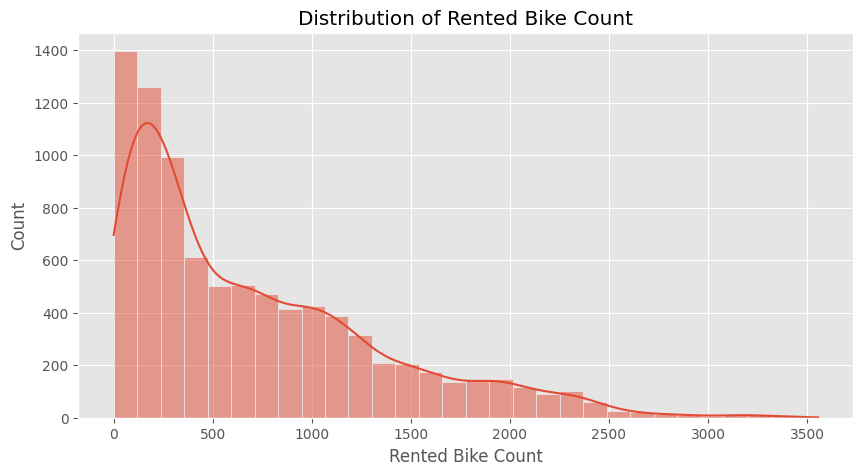

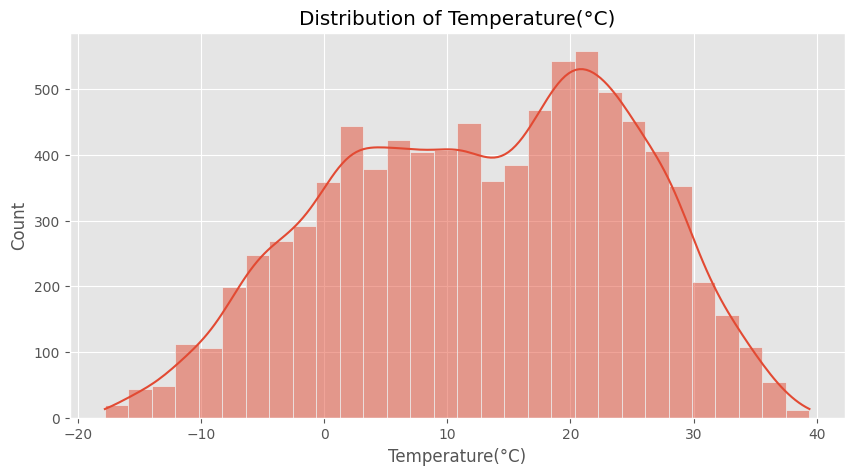

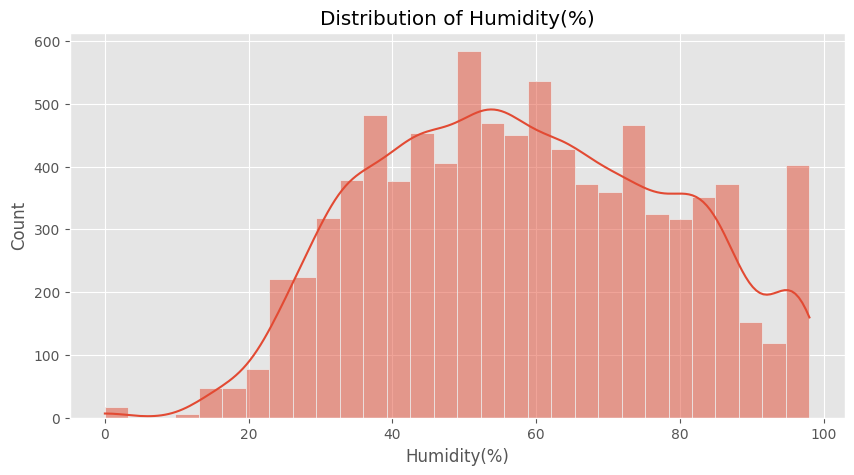

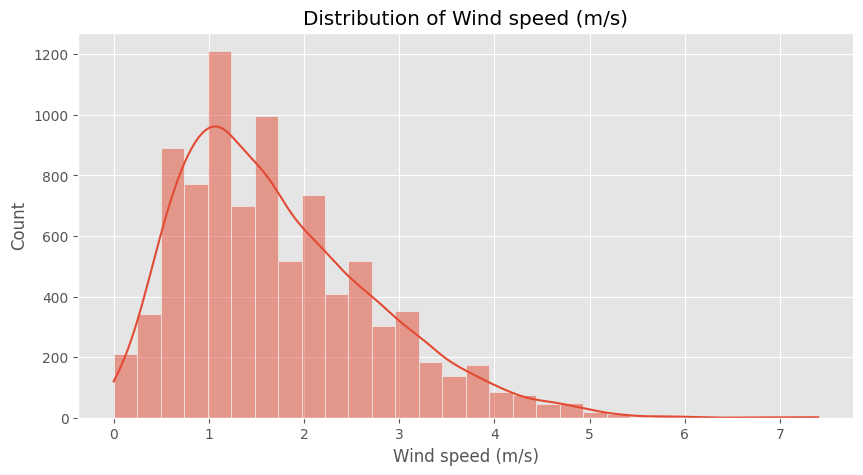

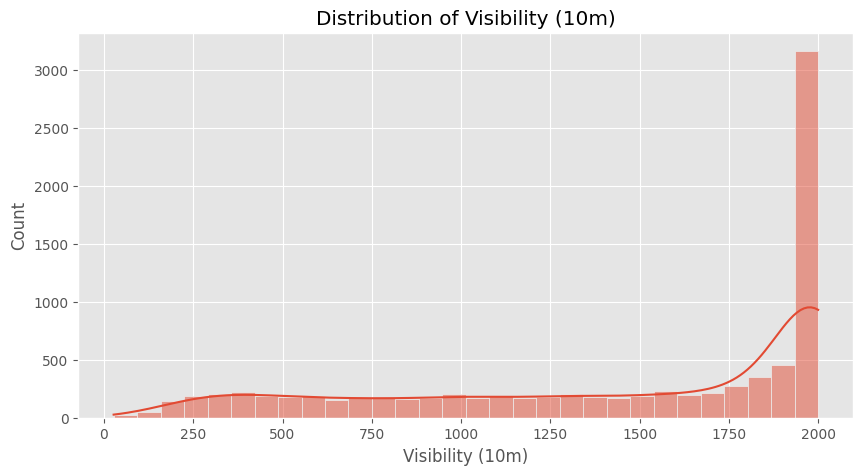

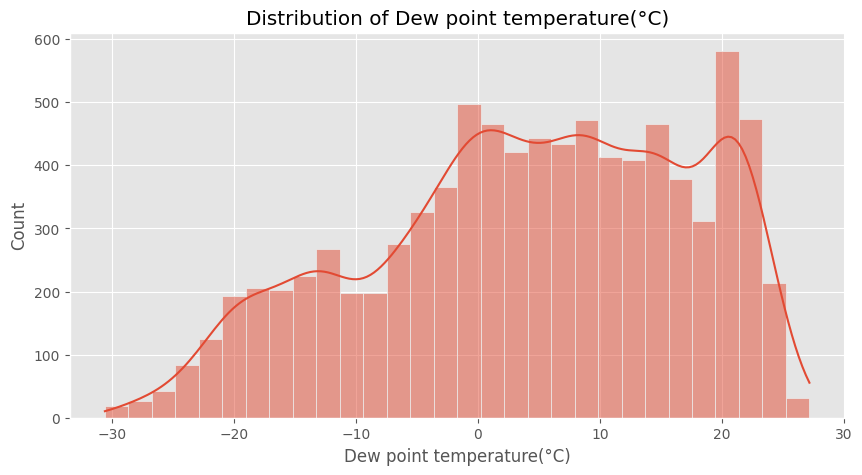

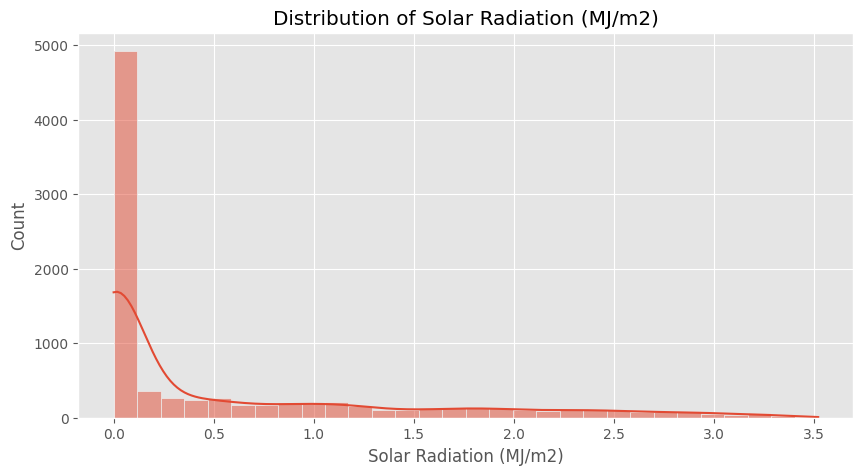

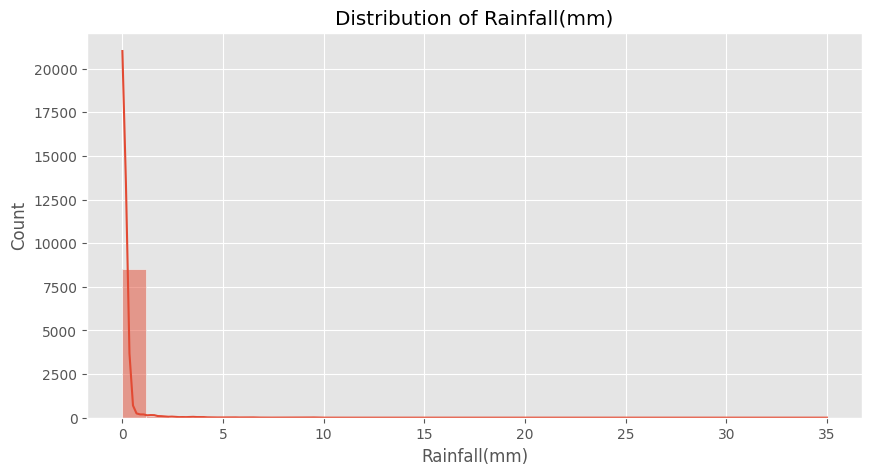

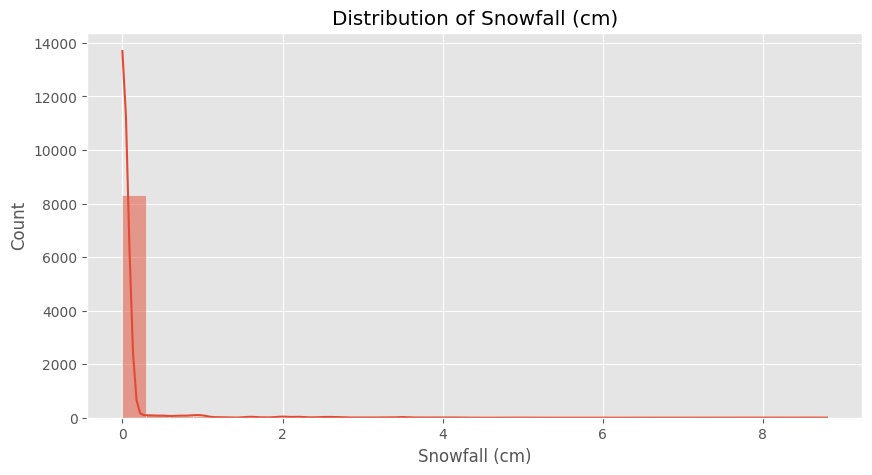

In [20]:
for col in numerical_col:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [14]:
df['Rented Bike Count'].agg(["mean", "median", "std"])

mean      704.602055
median    504.500000
std       644.997468
Name: Rented Bike Count, dtype: float64

### 3.2. Bivariate Analysis

#### 3.2.1. Box plots of numerical variables vs. categorical variables

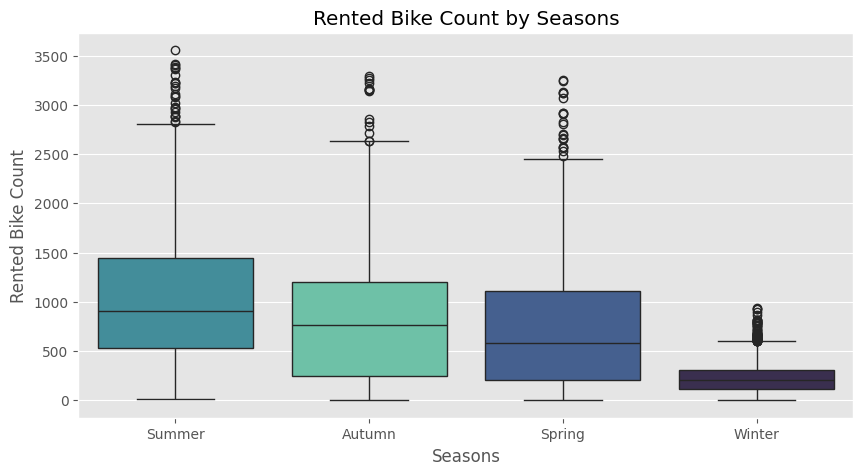

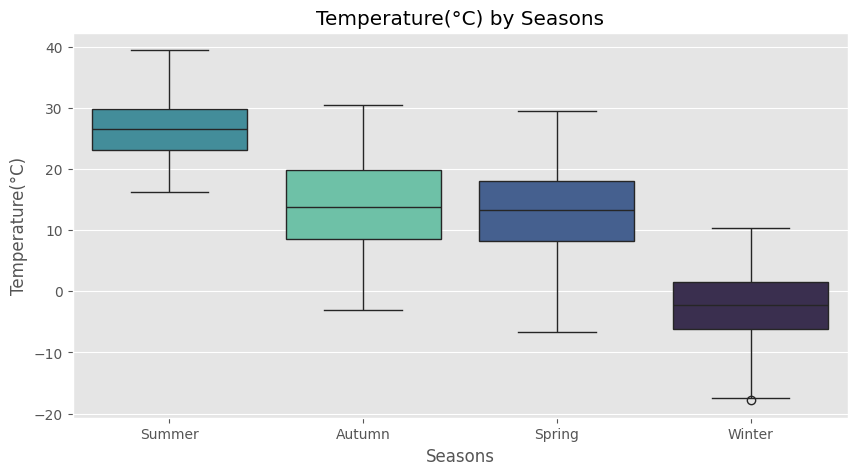

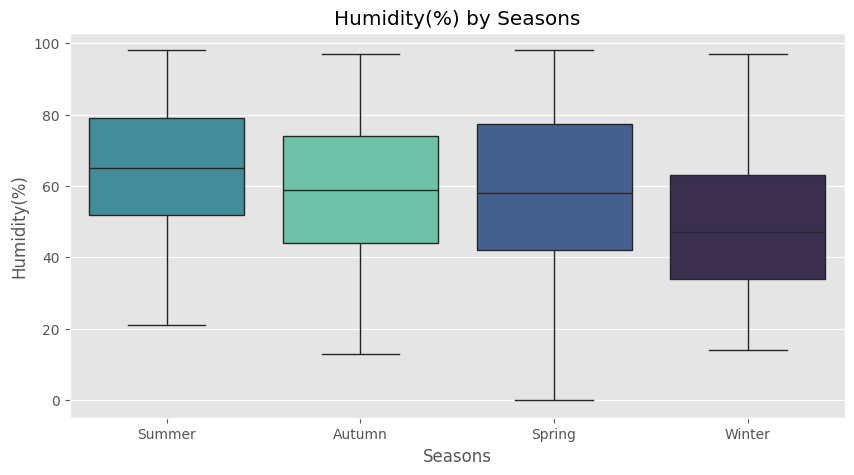

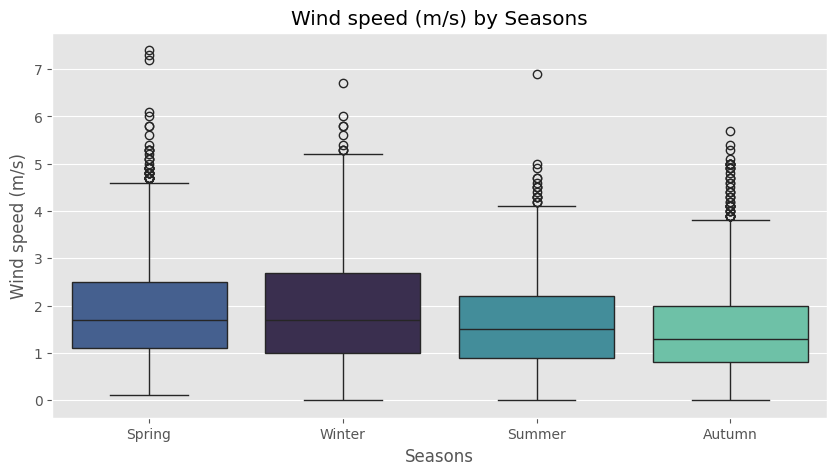

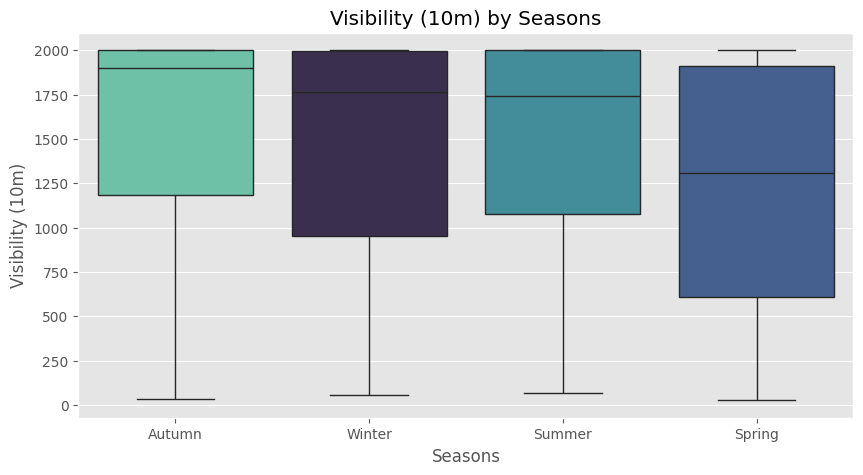

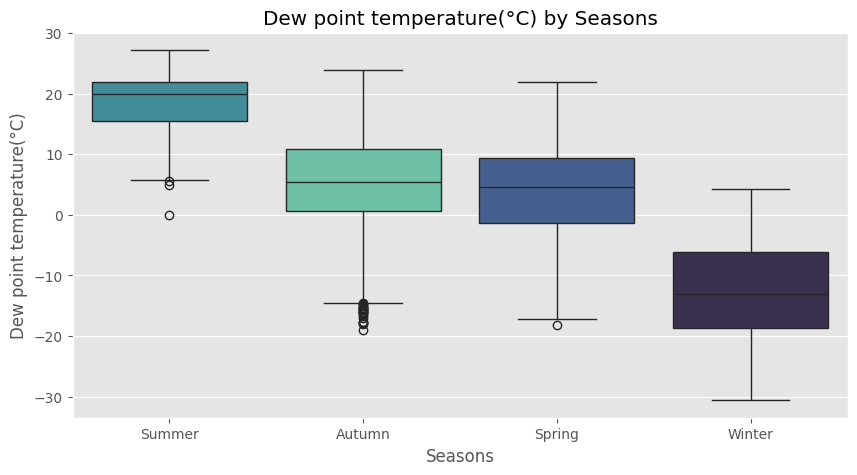

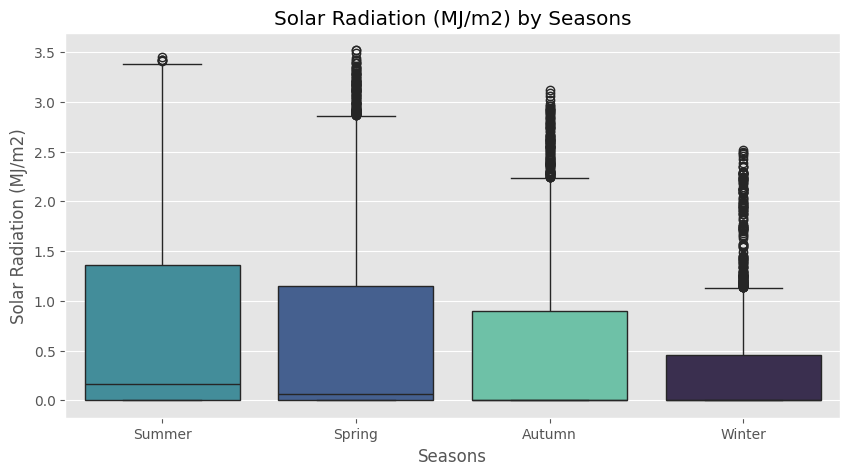

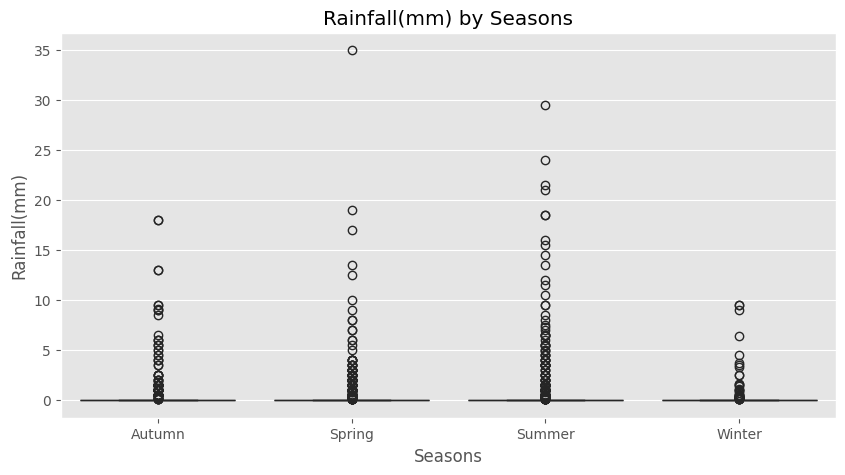

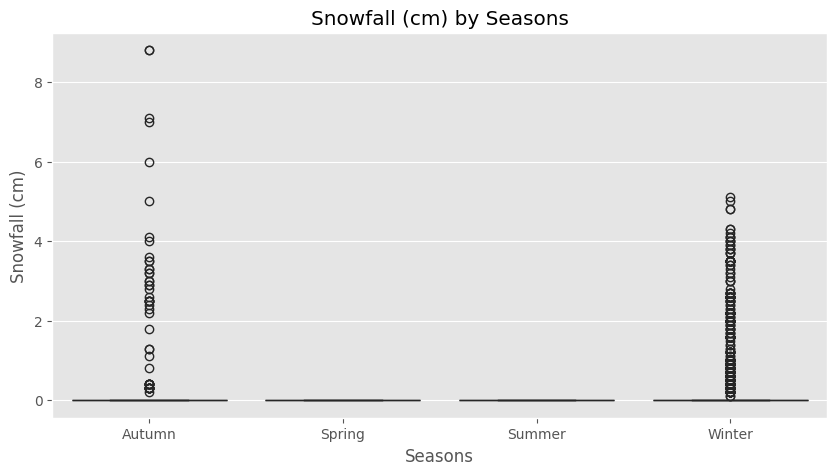

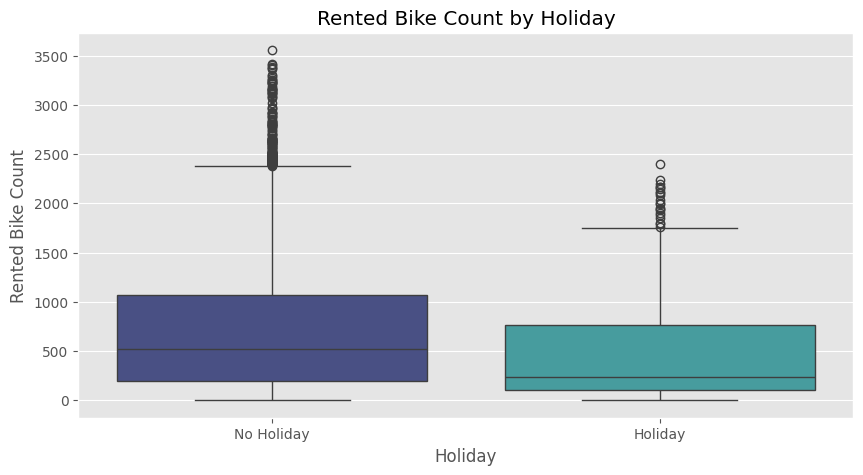

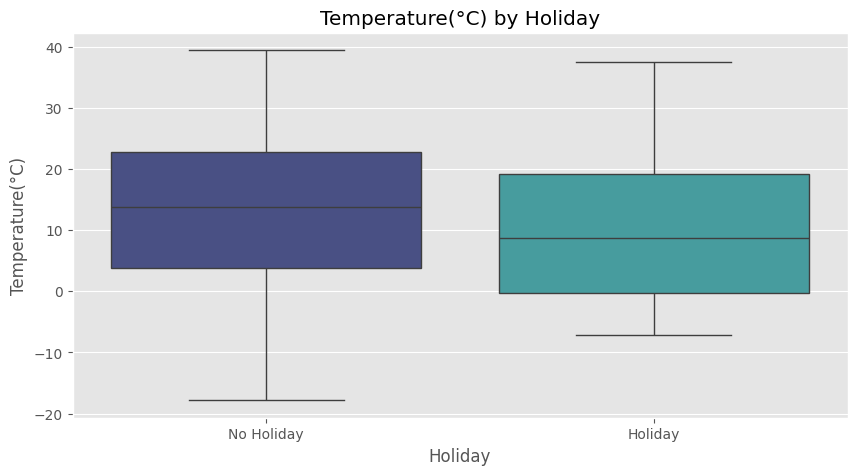

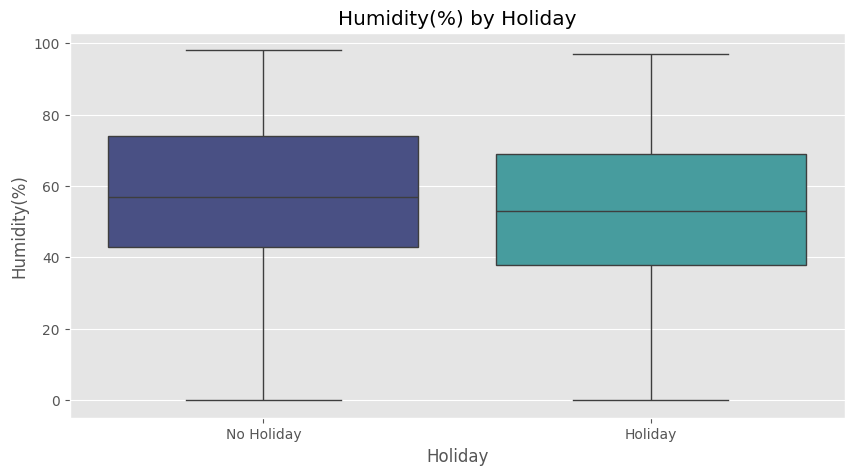

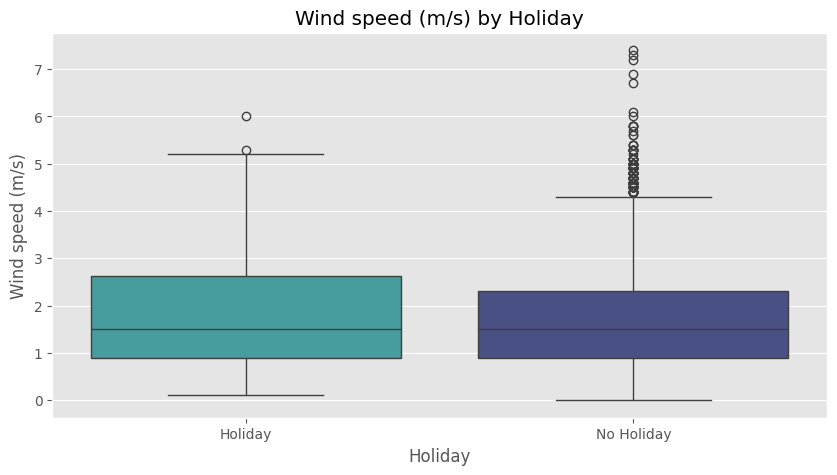

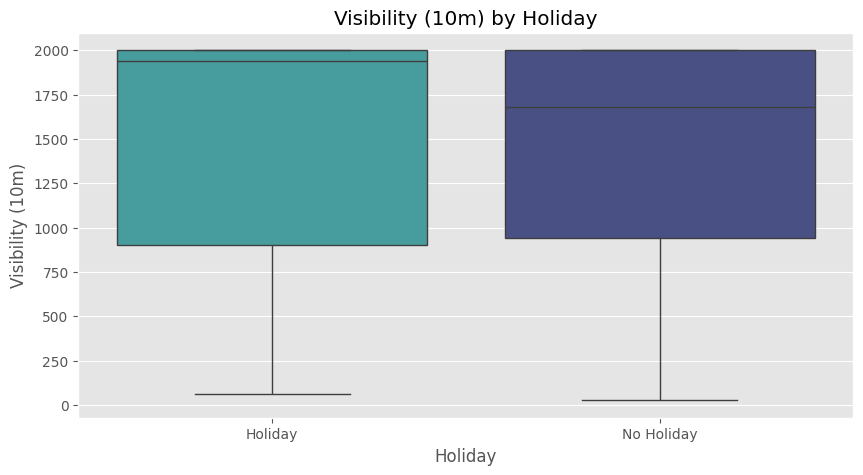

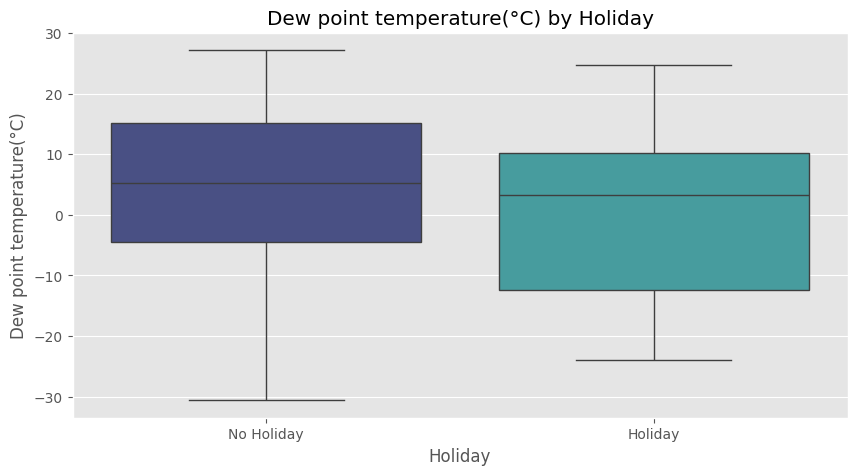

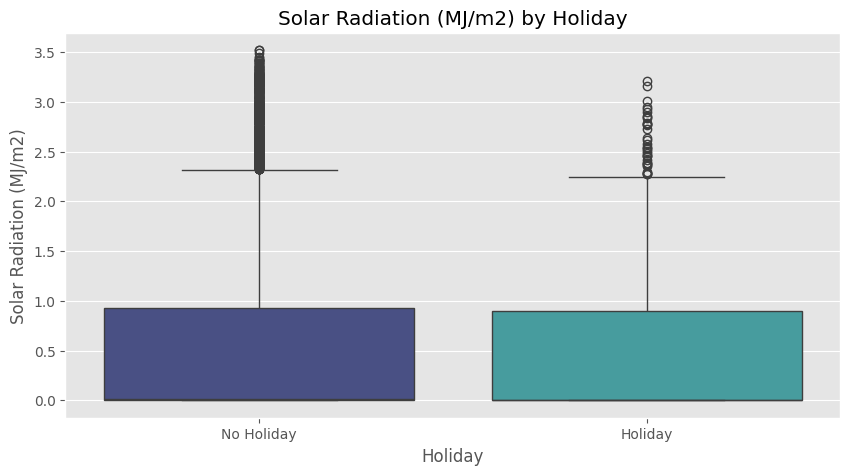

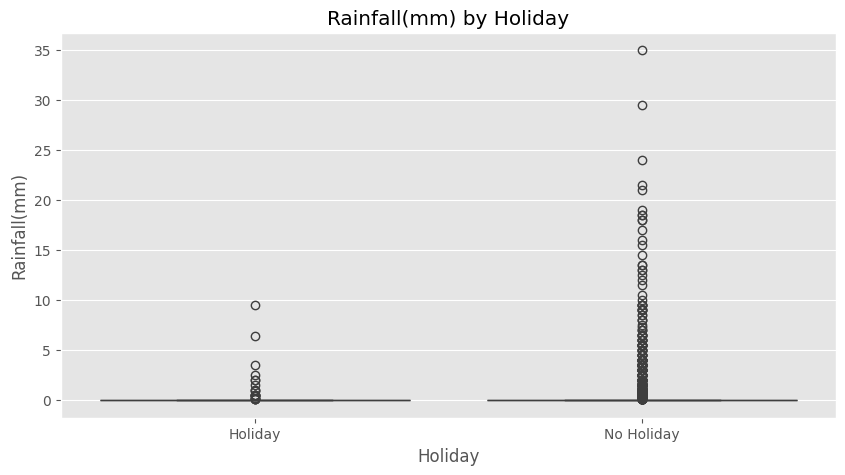

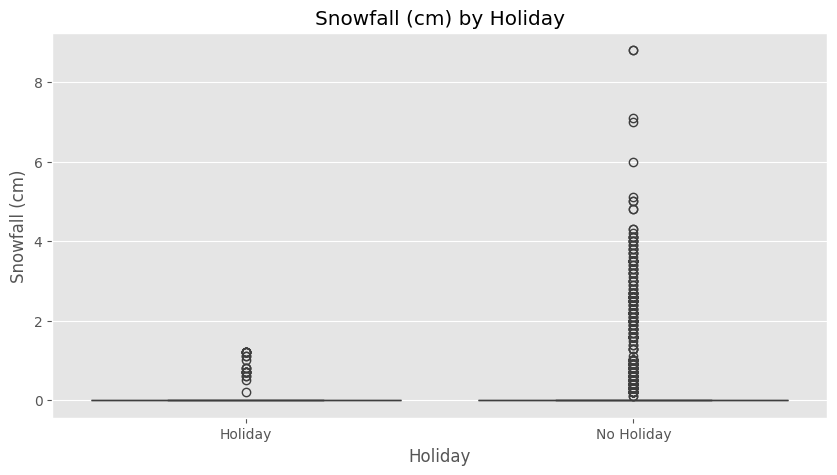

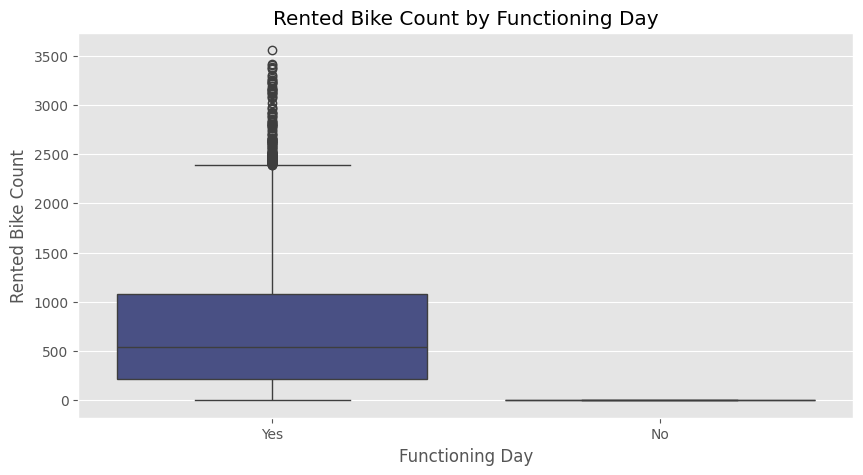

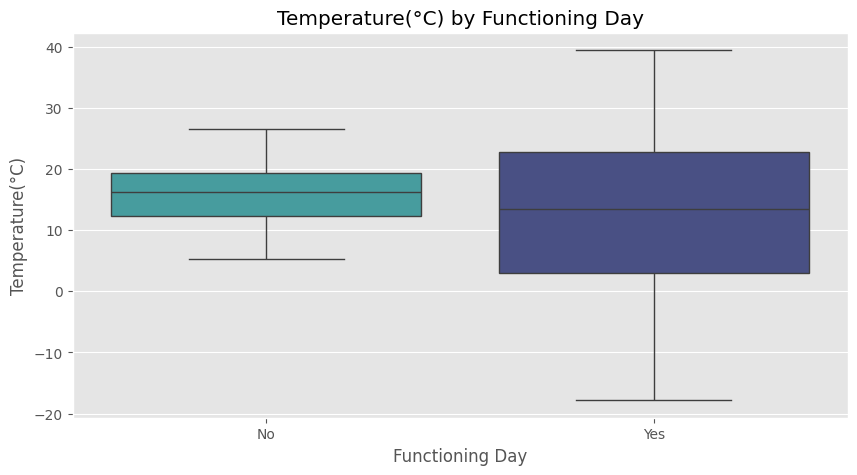

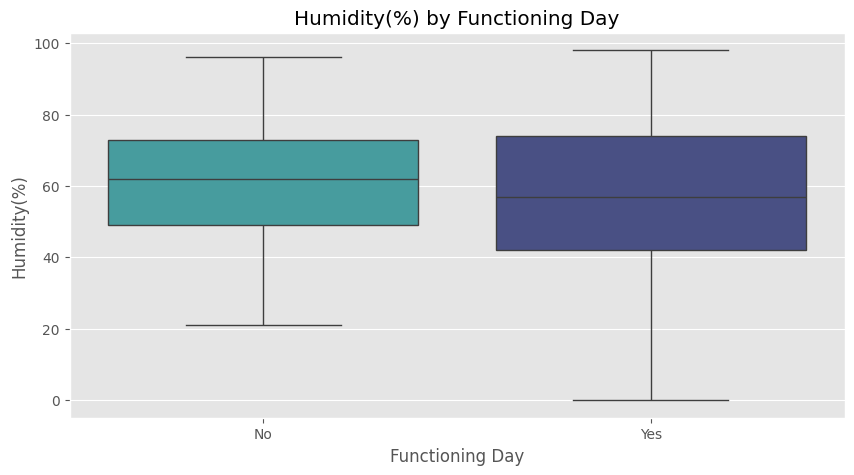

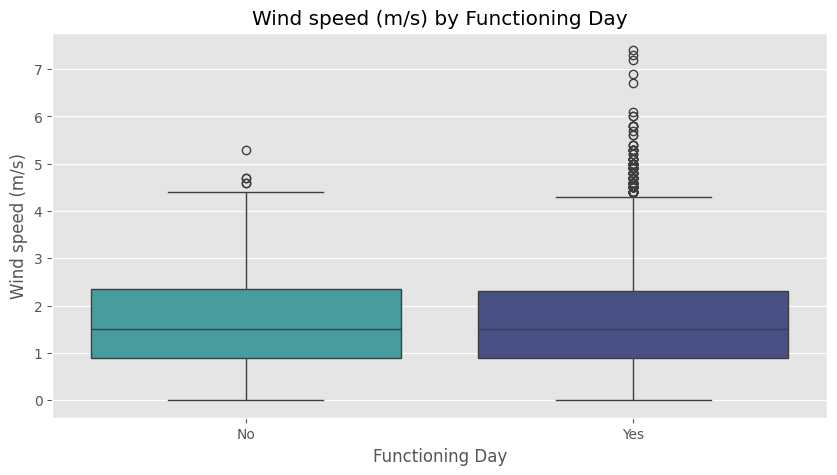

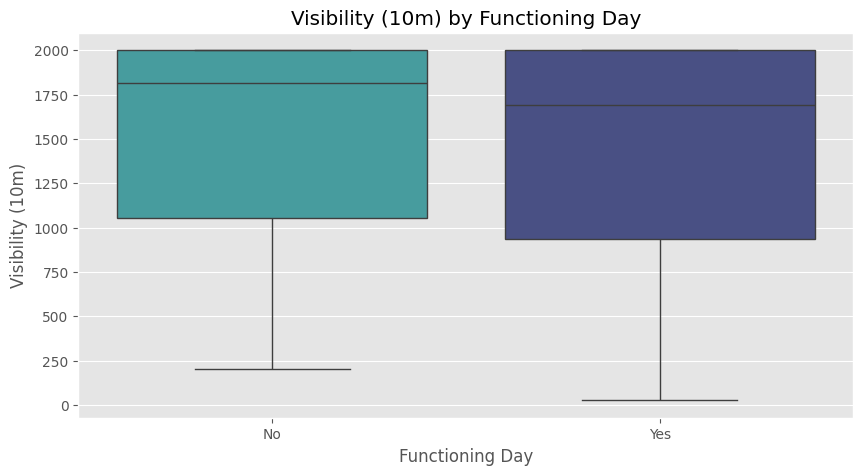

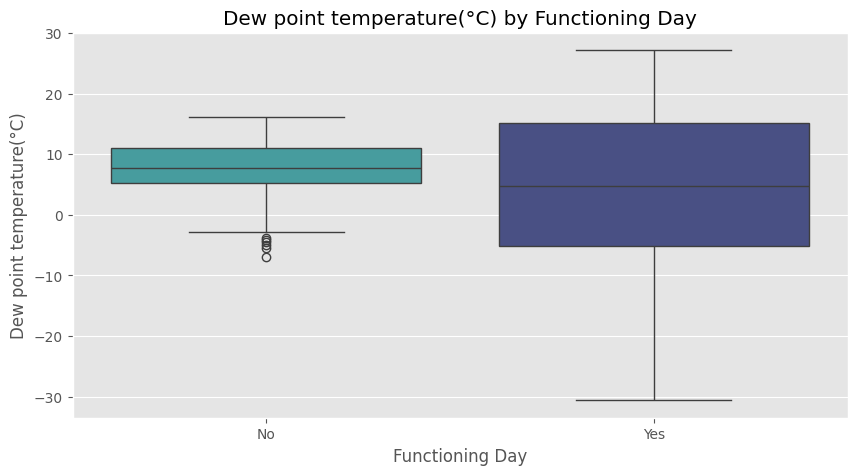

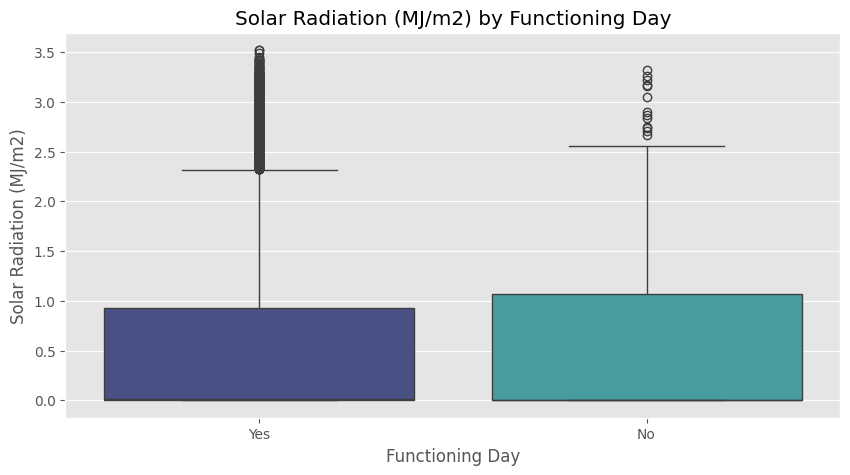

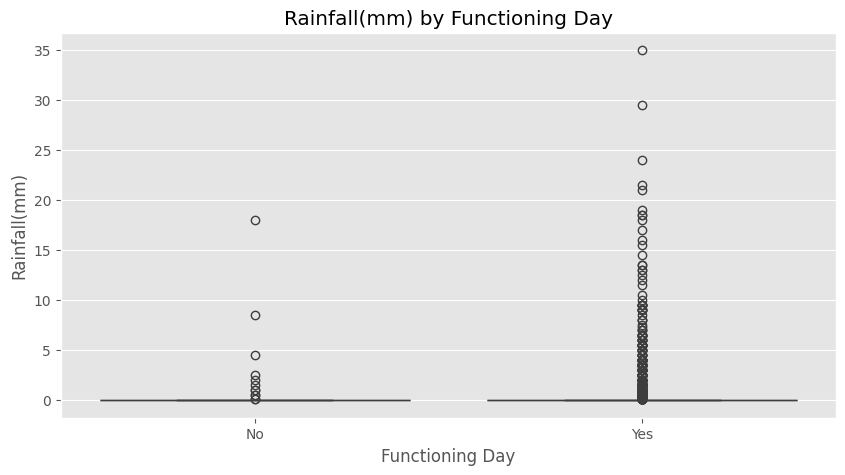

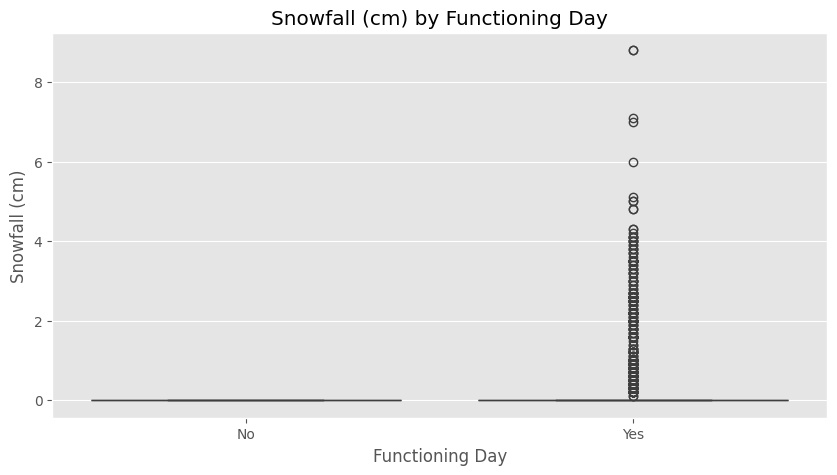

In [88]:
for col_c in categorical_col:
    for col_n in numerical_col:
        plt.figure(figsize=(10,5)) 
        median_values = df.groupby(col_c)[col_n].median()
        sorted_categories = median_values.sort_values(ascending=False).index
        sns.boxplot(x=df[col_c], y=df[col_n], order=sorted_categories, palette='mako', hue=df[col_c], legend=False)
        plt.title(f'{col_n} by {col_c}')
        plt.xlabel(col_c)
        plt.ylabel(col_n)
        plt.show()

### 3.3. Multivariate Analysis 

#### 3.3.1. Pairplot of numerical variables

<Figure size 1000x500 with 0 Axes>

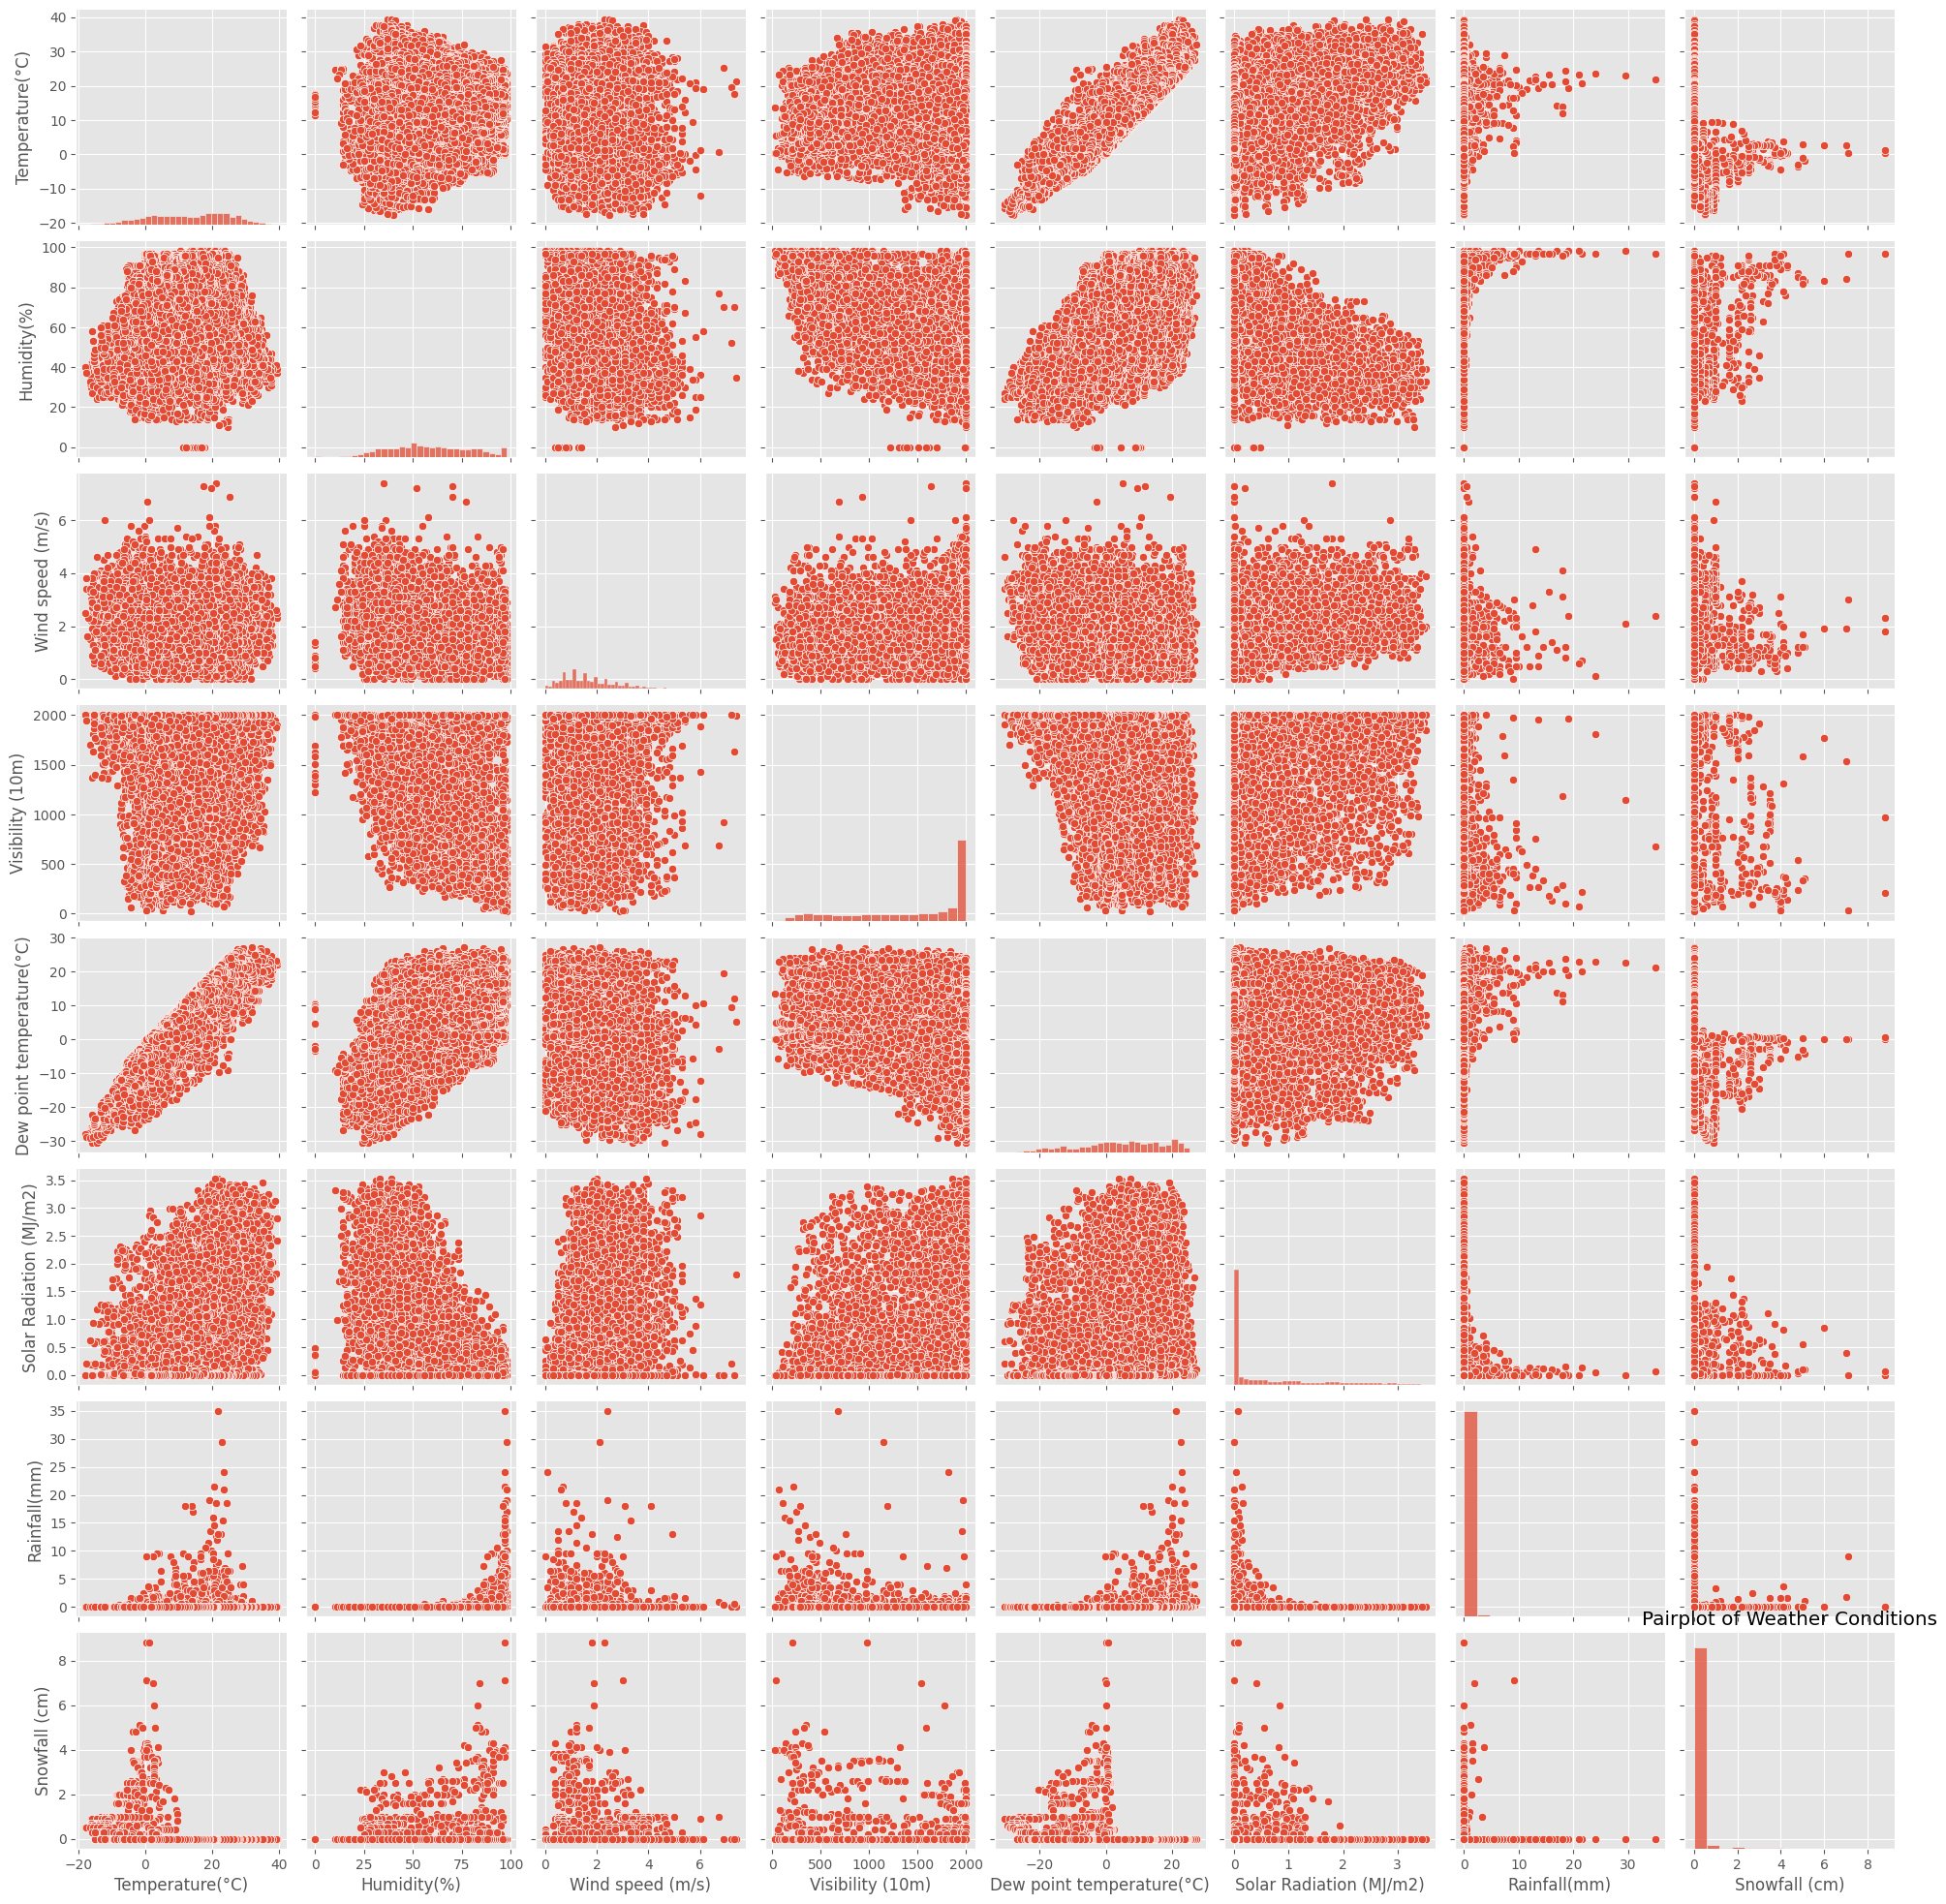

In [104]:
plt.figure(figsize=(10,5))
sns.pairplot(df[weather_col])
plt.title('Pairplot of Weather Conditions')
plt.show()

#### 3.3.2. Heatmap of numerical variables

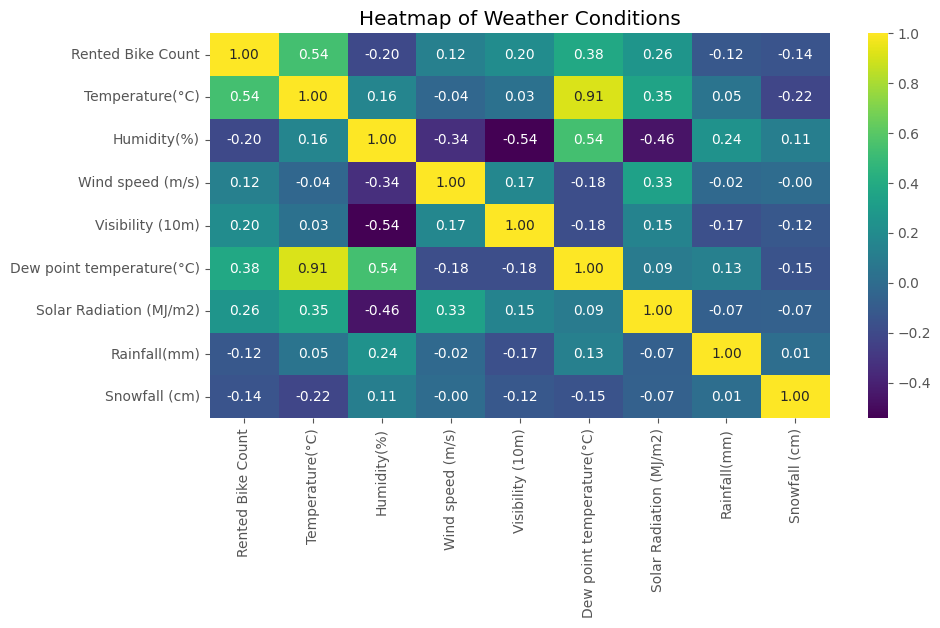

In [111]:
corr = df[numerical_col].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap of Weather Conditions')
plt.show()

### 3.4. Time Series Analysis

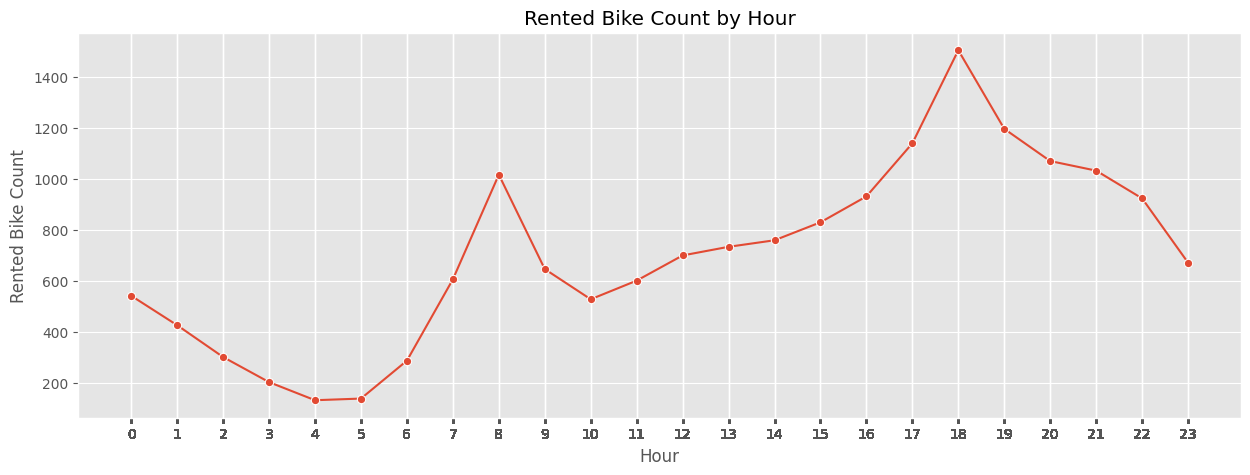

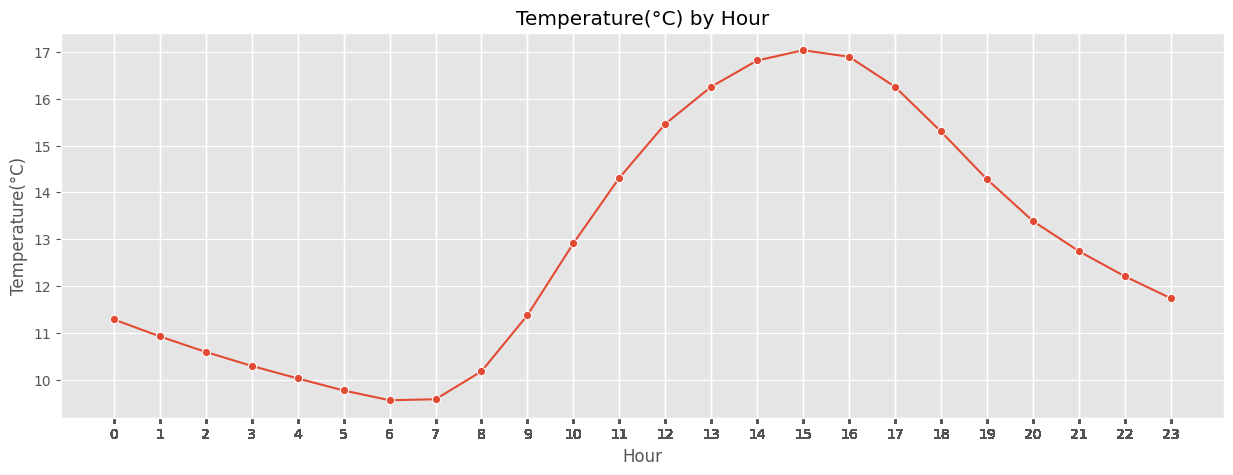

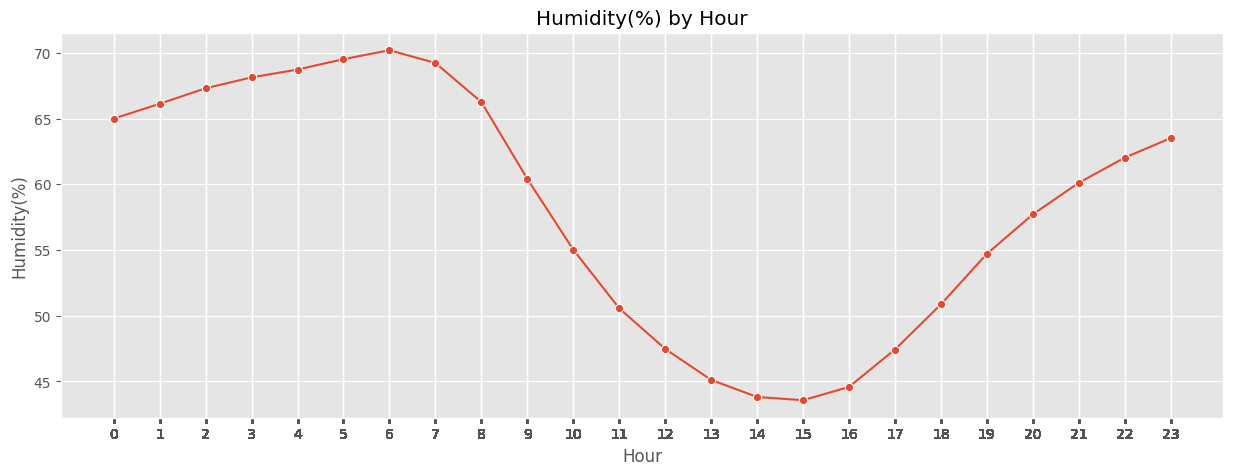

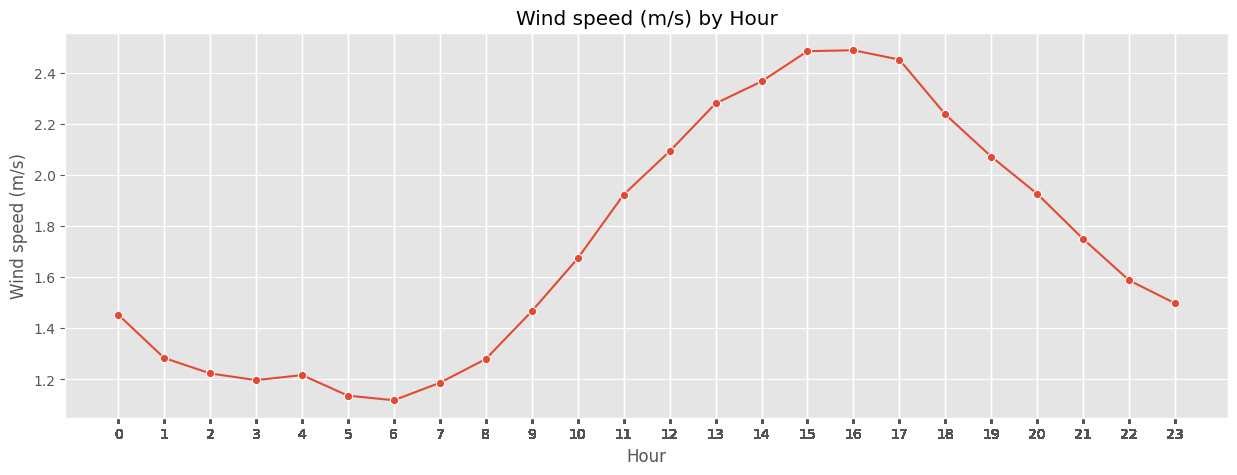

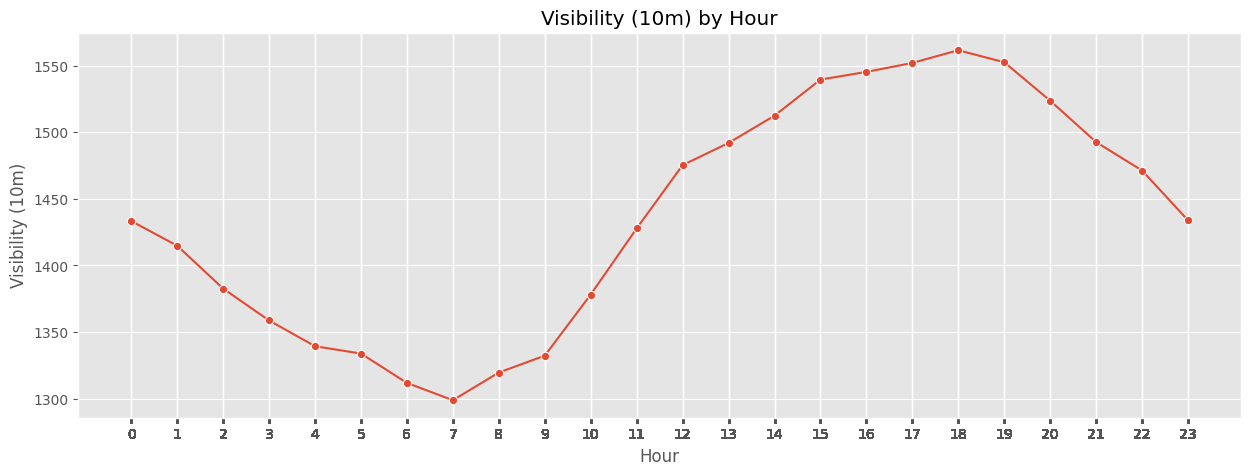

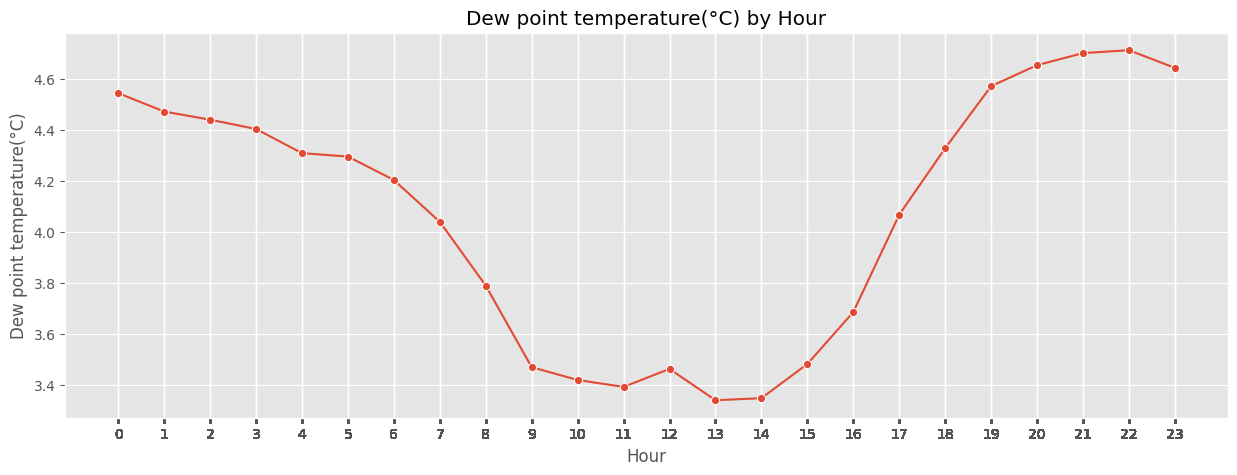

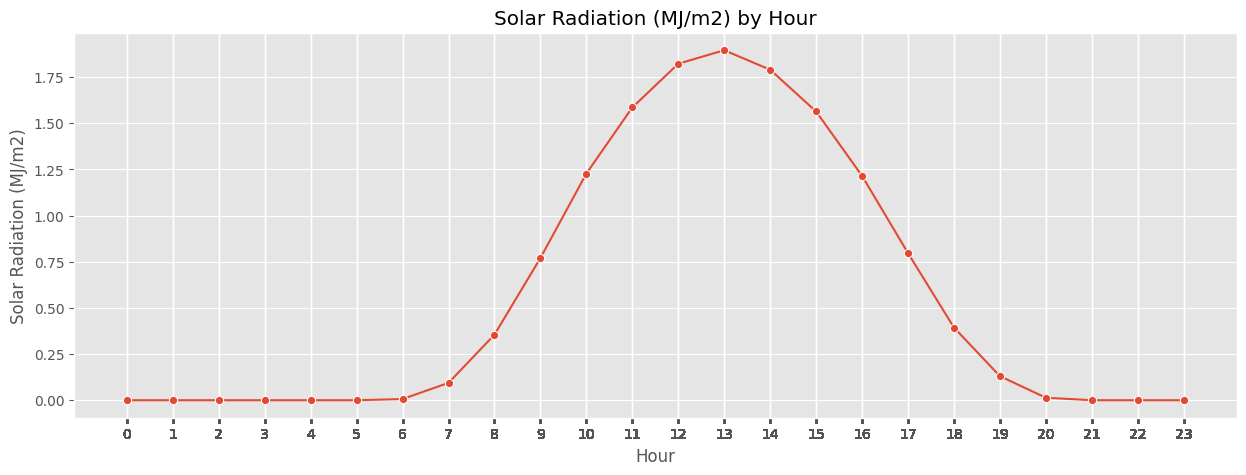

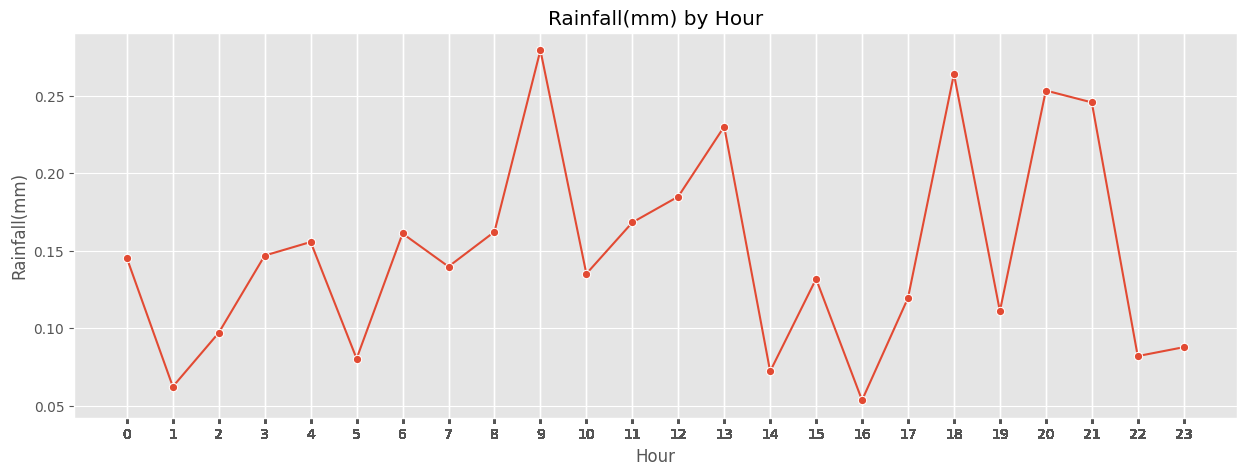

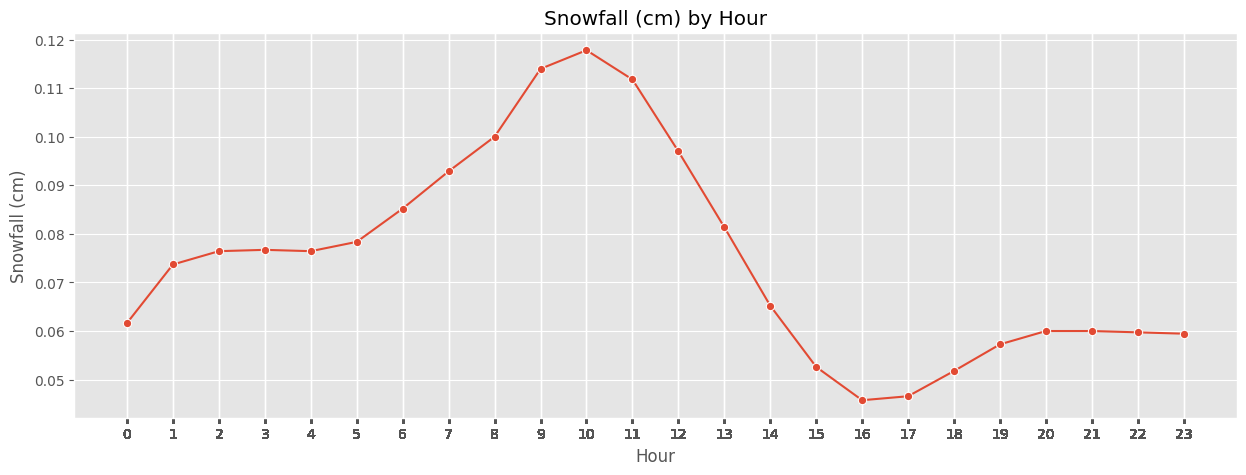

In [41]:
# Analysis by hour
for col in numerical_col:
    plt.figure(figsize=(15, 5))
    df_mean = df.groupby('Hour')[col].mean().reset_index()
    sns.lineplot(data=df_mean, x='Hour', y=col, marker='o')
    plt.title(f'{col} by Hour')
    plt.xlabel('Hour')
    plt.ylabel(col)
    plt.xticks(ticks=df['Hour'])
    plt.show()

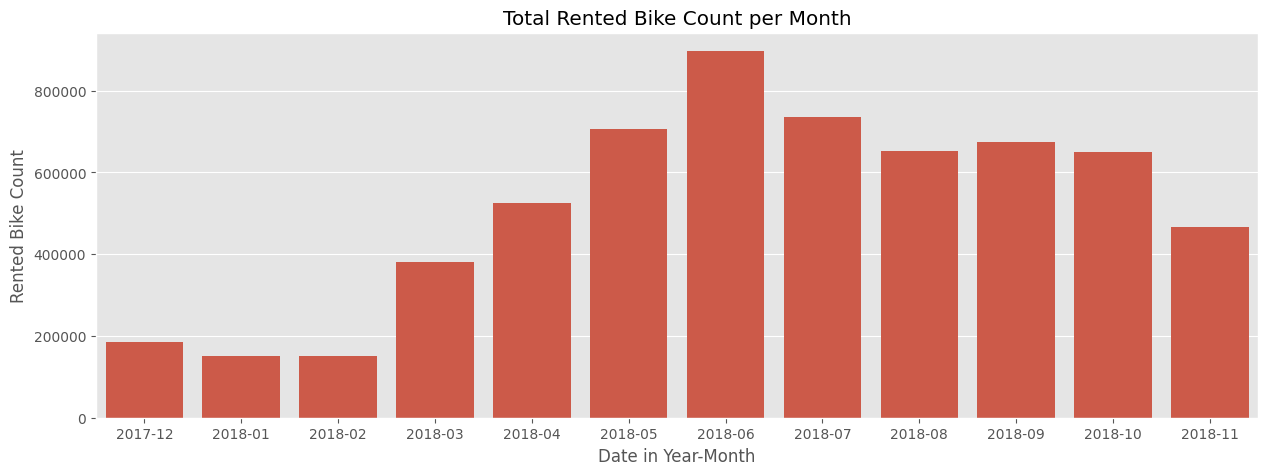

In [81]:
plt.figure(figsize=(15,5))
df['Year-Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()
df['Year-Month'] = df['Year-Month'].dt.strftime('%Y-%m')
df_grouped = df.groupby('Year-Month')['Rented Bike Count'].sum().reset_index()
sns.barplot(data=df_grouped, x='Year-Month', y='Rented Bike Count')
plt.title('Total Rented Bike Count per Month')
plt.xlabel('Date in Year-Month')
plt.ylabel('Rented Bike Count')
plt.show()

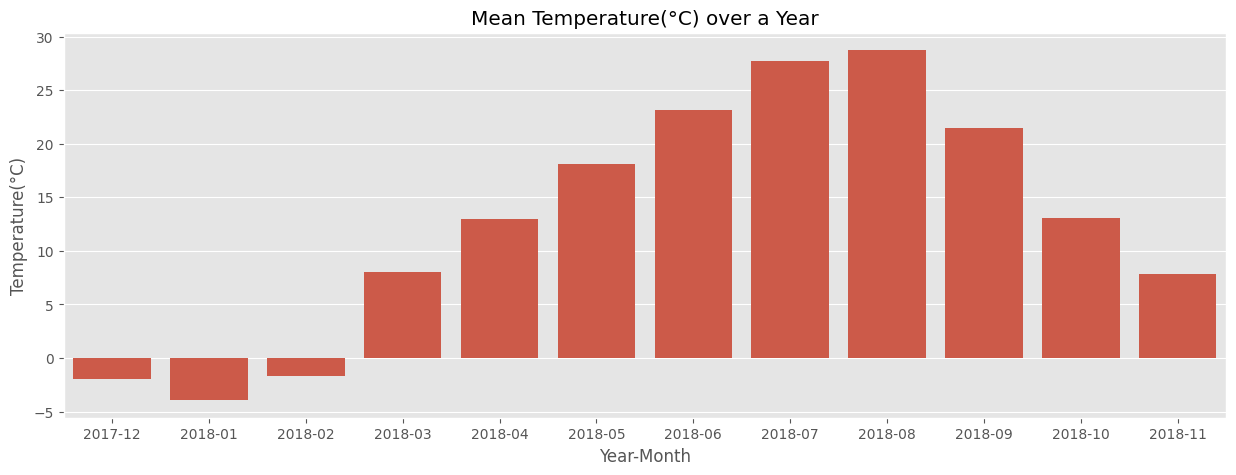

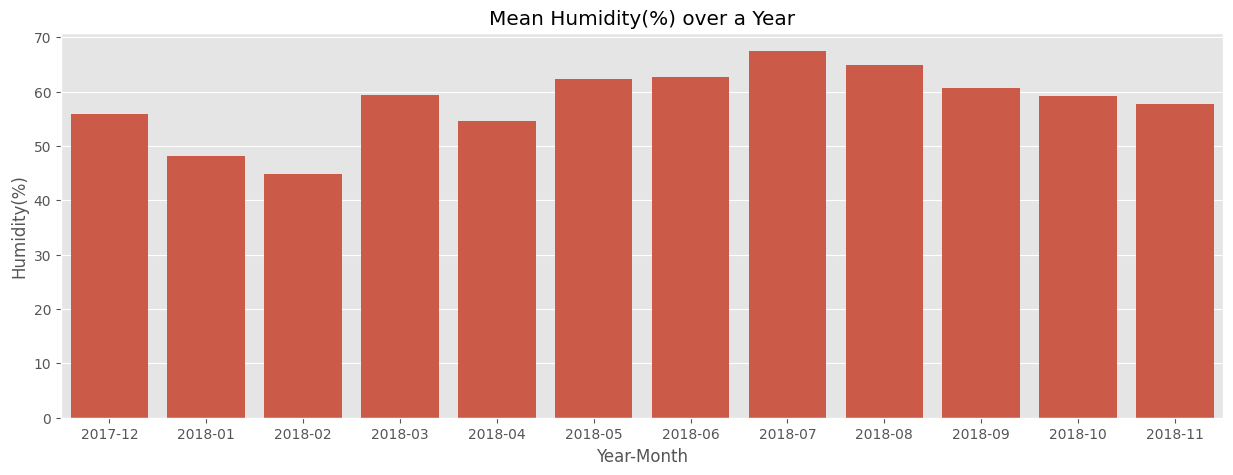

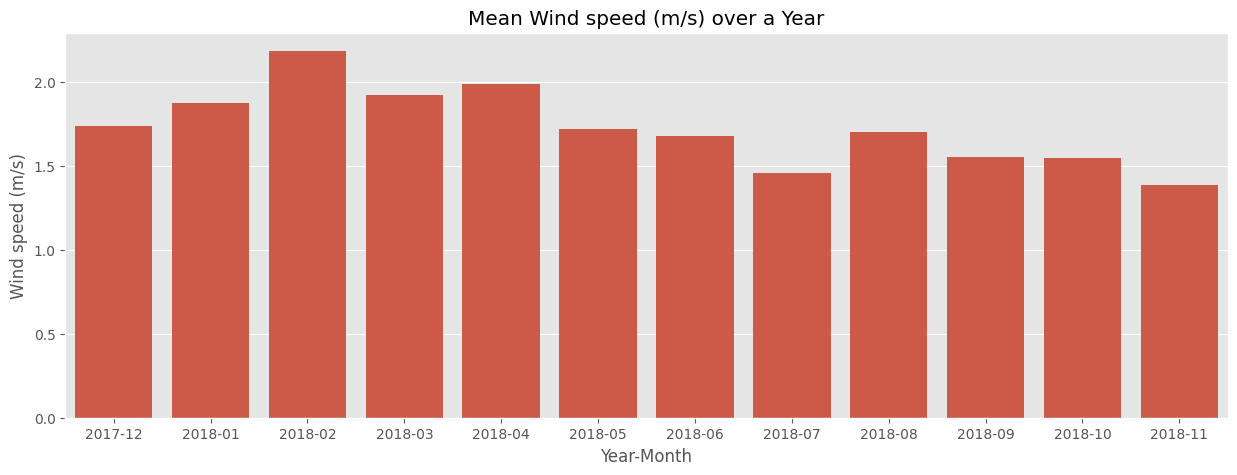

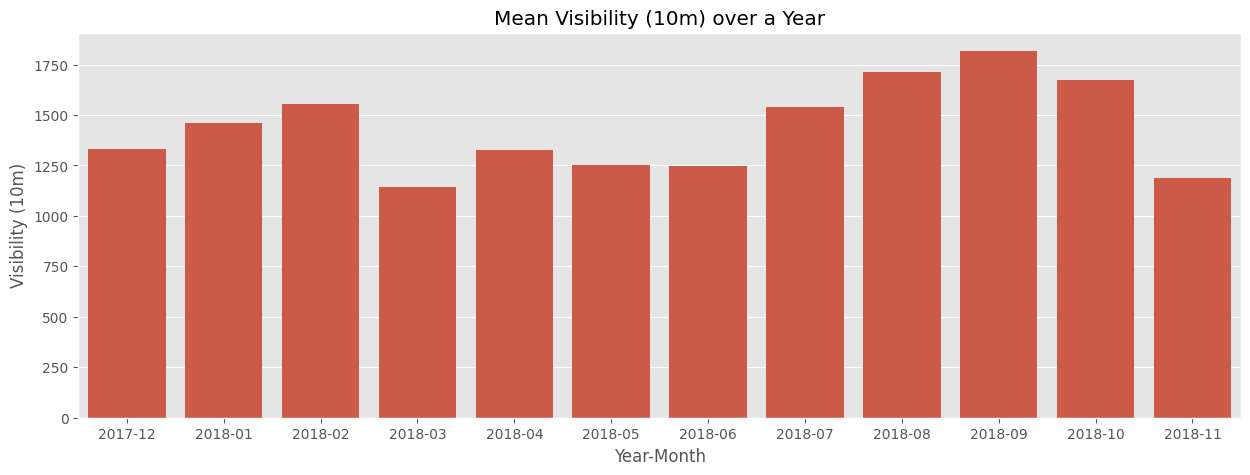

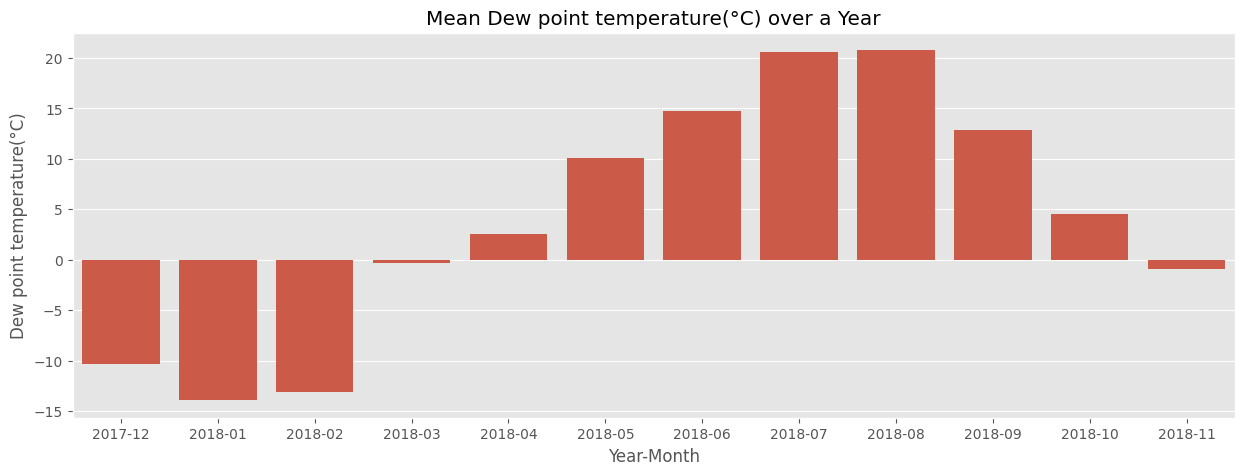

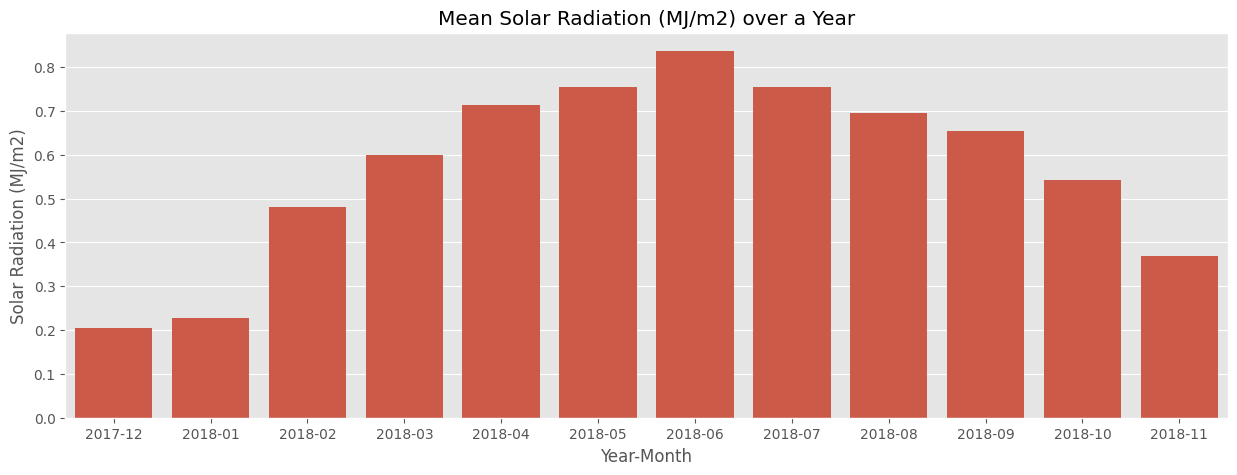

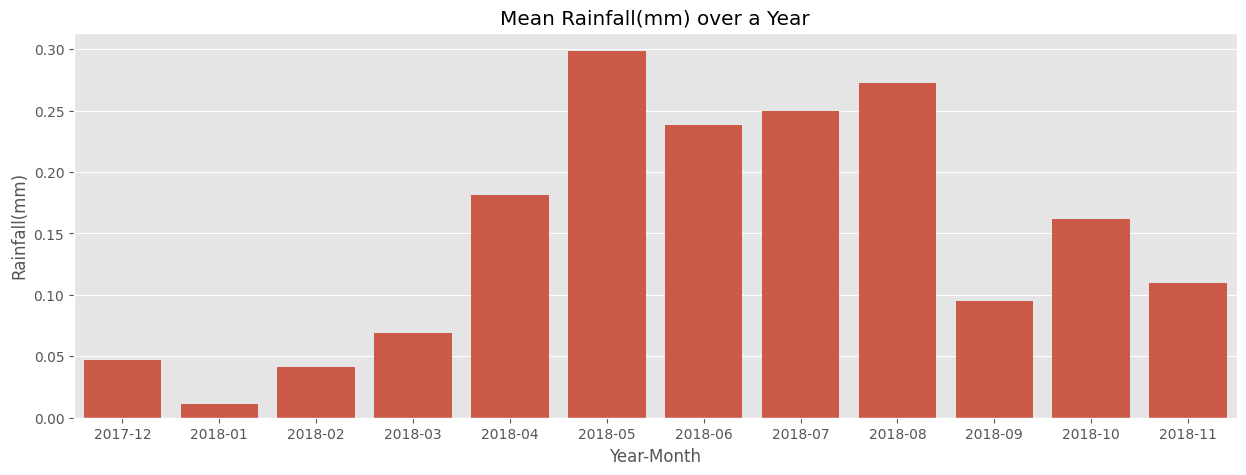

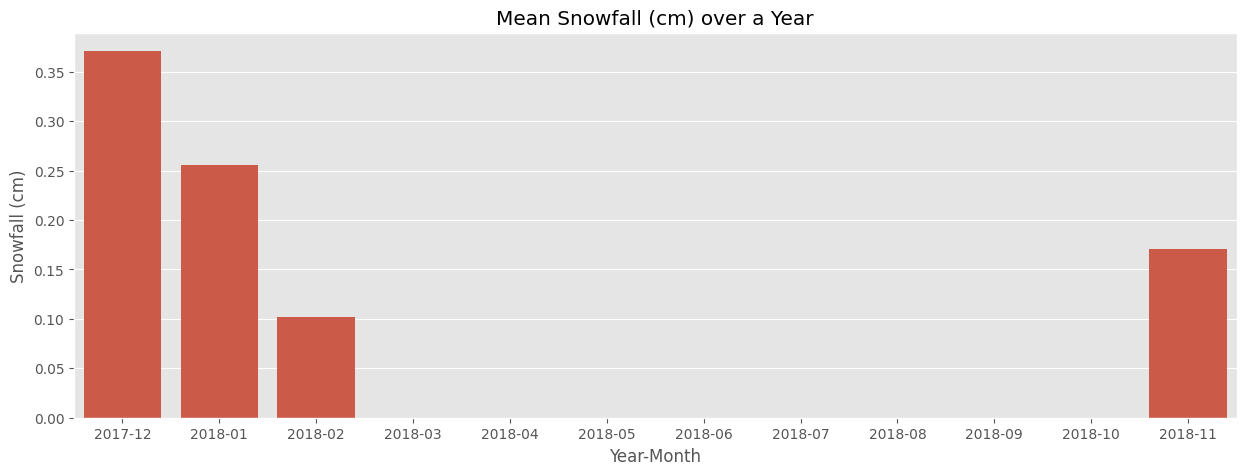

In [82]:
for col in weather_col:
    plt.figure(figsize=(15, 5))
    df['Year-Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()
    df['Year-Month'] = df['Year-Month'].dt.strftime('%Y-%m')
    df_grouped = df.groupby('Year-Month')[col].mean().reset_index()
    sns.barplot(data=df_grouped, x='Year-Month', y=col)
    plt.title(f'Mean {col} over a Year')
    plt.xlabel('Year-Month')
    plt.ylabel(col)
    plt.show()

## 4. Data Modeling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### 4.1. Linear Regression 

In [101]:
from sklearn.linear_model import LinearRegression

X = df[weather_col]
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# Coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Absolute Error: 366.038973210243
Coefficients: [ 3.70085445e+01 -1.01475881e+01  5.39115488e+01 -5.80032998e-03
 -1.41463380e+00 -1.19663762e+02 -5.21082769e+01  4.06896049e+01]
Intercept: 810.7412620341786


### 4.2. Lasso Regression

In [102]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X = df[weather_col]
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the Lasso model with a specific lambda (alpha)
lasso = Lasso(alpha=0.1)  

# Fit the model
lasso.fit(X_train, y_train)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Mean Absolute Error: 365.9398602000657
Coefficients: [ 425.0674541  -213.62797541   55.81504793   -3.35990387   -1.46809118
 -103.58739734  -55.32293949   18.31040226]
Intercept: 704.7678367579908


In [103]:
from sklearn.linear_model import LassoCV

# Automatically find the best alpha using cross-validation
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Use the best alpha found
best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)

# Fit the model again with the best alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)

# Make predictions
y_pred = lasso_best.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)


Best alpha: 1.4991813601996438
Mean Absolute Error: 365.6751078241037
Coefficients: [ 425.0674541  -213.62797541   55.81504793   -3.35990387   -1.46809118
 -103.58739734  -55.32293949   18.31040226]
Intercept: 704.7678367579908


### 4.3. Ridge Regression

In [99]:
from sklearn.linear_model import Ridge

X = df[weather_col]
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the Ridge model
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# Coefficients
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

Mean Absolute Error: 366.01005344264985
Coefficients: [ 435.61695801 -209.26524135   55.88651745   -3.52713857  -13.41154622
 -104.28878836  -55.54637729   18.37129086]
Intercept: 704.7678367579908


### 4.4. Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor

X = df[weather_col]
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model with specific parameters
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 268.5188395167428


In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)

print("Best parameters found: ", rf_grid.best_params_)

y_pred = rf_grid.best_estimator_.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

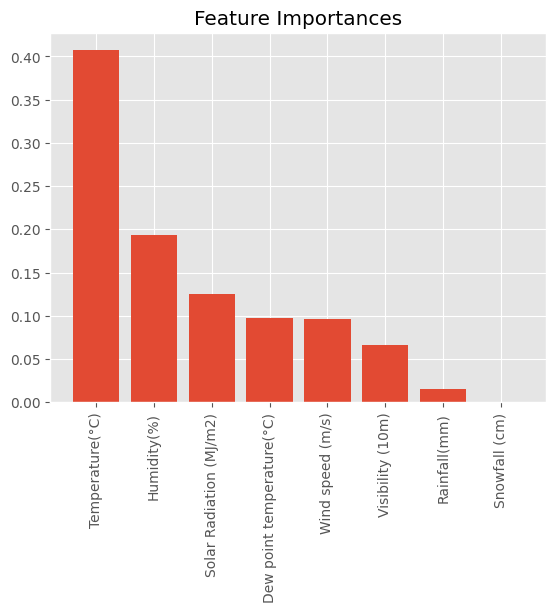

In [108]:
# Feature Importance
importances = rf_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation = 90)
plt.show()

In [112]:
# Export to Excel
df.to_excel('seoul_bike_sharing.xlsx', sheet_name='Data')